# Probability by counting

In [15]:
import numpy as np 
import scipy   
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline

### Objectives of the module 

- **Sample space** $\Omega$ is a set whose elements are called outcomes or events.
- **Events** can be constructed by forming subsets (A, B, C etc) of $\Omega$ 
- **Probability function** P(A) associates a numeric value of probability to each event A. 
- **Venn diagrams** visualize P(A) as a "volume fraction" of our confidence in the event expressed on 0-1 scale.
- **Probability axioms** defining a set of logical rules for creating composite events from trivial ones.
- **Probability of mutually exclusive events is additive"** P(A or B)= P(A) +P(B)

- The sample space can be **discrete:** examples are the possible outcomes for a coin. We call probability function a **probability mass function** 
    - An important example is **Binomial distribution**
    
- The sample space can be **continuous:** examples are position of gas molecules in a box. We call probability function a **probability distribution function**
    - An important example is **Gaussian distribution**
  

- **The law of large numbers** and **Stringling approximation** explain why repeated experiments converge to robust mean values and why Gaussian distribution is so ubiqutious. 

- **Frequencist apporach:** In practice probability is often computed via counting a number of occurences of outcomes 
- **Bayesian approach:** In physical scientces and modeling probability one often deals with situations where counting is not posisble. Hence pornbability is interpreted as a degree of belief in each possible event.


### Sample space

The **sample space**, often signified by an $S$ is a set of **all possible outcomes** of a trial.

-  if our trial is a single roll of a six-sided die, then the sample space will be:

$$S = {1, 2, 3, 4, 5, 6}$$

- If our trial is choosing a coin from a bag, then the sample space might be:

$$S = {quarter, dime, nickel, penny}$$

### Events

An **Event** specifies the outcome of a trial. Events can be the outcome of a single trial OR a set of outcomes.

Events are often designated with an $E$.

- If we roll a die and want to specify our event to be that we get a one (1), then our event might be defined:

$$E = {1}$$

- If we want to specify our event to be that we get an even number, then our event might be defined:

$$E = {2, 4, 6}$$

### Compute probabilities through counting 

To calculate a simple probability of an event, labeled $P(E)$, we divide the number of ways of getting the event, $n(E)$ by the number of elements in the sample space, $n(S)$.

$$
\boxed{\Large P(E) = \frac{n(E)}{n(S)}}
$$

For example, if we calculate the probability of rolling a `1` on a six sided die...

```python
E = {1}
S = {1, 2, 3, 4, 5, 6}


n(E) = 1      # number of ways to get the event
n(S) = 6      # number of elements in the sample space

P(E) = 1 / 6
```

In [29]:
def probability(S={1,2}, E={1}):
    '''
    Simple function to calculate probability of die rolls
    Return the probability of an event given the event measure and the sample size measure
    '''
    
    return len(E)/len(S)

In [32]:
S={1,2,3,4,5,6,7,8,9,10}
E= {1} 
probability(S,E)

0.1

In [33]:
S={1,2,3,4,5,6,7,8,9,10}
E= {1,4,5} 
probability(S,E)

0.3

### Composite events and Venn diagrams

In [73]:
%%capture
!pip install matplotlib-venn #install if running locally
import matplotlib_venn as venn

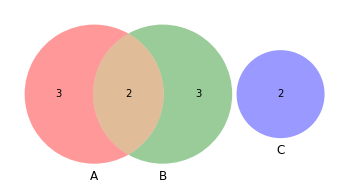

In [4]:
S = {-1, 0, 1, 2, 3,4,5,7, 20,90}

A = {1, 2, 3,4,5}

B = {0, 2, -1, 5,7}

C = {20,90}

D = {100}

venn.venn3([A, B, C], set_labels=('A','B', 'C'))

#### Creating new events out of sets

- When dealing with sets in python & means intersection and | means union.
- We apply these operators to create composite sets

In [5]:
print("𝐴∩𝐵 = ", A&B)
print("𝐴∪B = ", A|B)     
print("𝐴-B = ", A-B)          

𝐴∩𝐵 =  {2, 5}
𝐴∪B =  {0, 1, 2, 3, 4, 5, 7, -1}
𝐴-B =  {1, 3, 4}


Computing complements of sets

In [64]:
print("A^c = ", len(S-A))
print("B^c = ", len(S-B))
print("(𝐴∪𝐵)^c = ", len(S-(𝐴|𝐵)))
print("𝐴^c ∩ B^c = ", len((S-A)&(S-B)))

A^c =  5
B^c =  5
(𝐴∪𝐵)^c =  2
𝐴^c  ∩ B^c =  2


### Translate words into probabilities

**Give a possible sample space $\Omega$ for each of the follow experiments**

- A two-sided coin is tossed. 

$$\Omega = {H,T}$$

- You choose the color of your new car's exterior (choices: red, black, silver, green) and interior (choices: black, beige)?

$$\Omega = {red, black, silver, green} \times {black, beige}$$
    
**Define Sample space**

- A fair coin is tossed 200 times in a row  

$$\Omega = \{H,T\}^{200}$$

- You count the number of people who enter a department store on a particular Sunday 

$$\Omega = \{All\,\, numbers\,\, from\,\, 0\,\, to\,\, 6\,\, billion\}$$ 

- You open up Hamlet  and pick a word at random 

$$\Omega = \{words\,\, in\,\,  Hamlet\}$$
    
**Let A, B, and C be events defined on a particular sample $\Omega$. Write expressions for the following combinations of events**

- All three events occur.

$$A \cap B \cap C$$ 

-  At least one of the events occurs 

$$A \cup B \cup C$$

-  A and B occur, but not C

$$A \cup B \cup C^{c}$$

### Probability Axioms

```{admonition} Nonnegativity
:class: tip 
 
For every event *A*, 
 
$$P(A) \ge 0$$
``` 

```{admonition} Normalization
:class: tip 
 
The probability of the entire sample space is equal to 1.
 
$$P(S)=1$$
``` 

```{admonition} Addition rule
:class: tip 
 
For any sequence of **disjoint** events, $A_i \cap A_j = \emptyset $, the probability of their union is the sum of their individual probabilities,
 
$$P\left( A_1 \cup A_2 \cup \ldots \right) = P\left(A_1\right) + P\left(A_2\right) + \ldots$$
``` 


```{admonition} Product rule
:class: tip 
 
For every event *A*, 
 
$$P(A,B,C)=P(A)P(B)P(C)$$
``` 

```{admonition} Complement
:class: tip 
 
Given that $A \cap \bar A=\emptyset$ and $A \cup \bar A=S$.
 
 $$P(\bar A)=1-P(A)$$
``` 
 
```{admonition} Conditional probability and Bayes Theorem
:class: tip 
 
Knoweldge of past events may change the probability of future events
 
$$P(A,B)=P(A|B)P(B)=P(B|A)P(A)$$
``` 

````{admonition} Example problems: 

```{dropdown}  We role two dice and record the total sum of numbers $T$. Suppose event $A$ is getting a total of $T = 9$ and event $B$ is getting a total of $T = 5$. What is the probability of A or B?

Clearly A and B cannot both occur the two events are mutually exclusive. There are 4 ways to get event A
(T = 9), and 5 ways to get event B (T = 5), so that there are 4 + 5 = 9 ways to get
either A or B, and so $P(A or B) = 9/36 = 1/4$
```

```{dropdown}  Now suppose event C is getting a total of $T = 12$ and event D is getting a double, where both dice are the same. What is the probability of C or D?

There is only one way to get 12, so P(C) = 1/36. There are six ways to get a double,
so P(D) = 6/36. However C and D are not exclusive—rolling a double six is an
example of both. The double six is already included in the calculation of P(D). So
P(C or D) = 6/36 + 1/36 − 1/36 = 6/36
```

````

### Bayes theorem

- **Marginal Probability:** The probability of an event irrespective of the outcomes of other random variables, e.g. 

$$P(A)$$

- **Joint Probability:** Probability of two (or more) simultaneous events, e.g. 

$$P(A, B)\,\,\,\, or \,\,\,\, P(𝐴∩𝐵) \,\,\,\,or \,\,\,\, P(A\,\, and\,\, B)$$

- **Conditional Probability:** Probability of one (or more) event given the occurrence of another event.

$$P(A\,\, given\,\, B)\,\,\,\, or \,\,\,\,P(A | B)$$

#### Computations with joint and codnitional probability

The joint probability can be calculated using the conditional probability

$$P(A, B) = P(B | A) \cdot  P(A)$$

> Note that joint probability is symmetric $P(A, B) = P(B, A)$

The conditional probability can be calculated using the joint probability. Thinking in terms of sets this shows that we are counting the fraction of A and B overlap confined within area of A, an event that has happened! 

$$P(B | A) = \frac{P(B, A)}{P(A)}$$

> Note that conditional probability is not symmetric $P(A | B) != P(B | A)$

There is another way of calculating conditional probability that is widely employed in practice.

$$P(B|A) = \frac{P(A|B) \cdot P(B) }{P(A)} = \frac{P(A|B) \cdot P(B) }{P(A|B) \cdot P(B) + P(A|B^c) \cdot P(B^c)}$$

Where we have used marginalization of joint probability to express $P(A)$ in terms od conditional probabilities

> The last formulate looks abstract but essentially this forumale is used to learn probability of some hypothesis $B$ given data $A$ $P(B|A)$. And for that we make use of likelihood of hypothesis $P(A |B)$ with a given data.  

````{admonition} Example 

```{dropdown}  A test for cancer is known to be 90% accurate either in detecting cancer if present or in giving an all-clear if cancer is absent. The prevalence of cancer in the population
is 1%. How worried should you be if you test positive? Try answering this question
with and without Bayes’ theorem.

- Only 1% population has cancer hence we get probability of an inidivual having (not having) cancer as:

$$P(X)=0.01\,\,\,\,hence\,\,\,\,\,\,\, P(X^c)=1-P(X)=0.99$$

- Accuracy of a test (how ofte positives show up when cancer is certain)

$$P(+|X) = 0.9 \\ P(-|X^c)=0.9$$

$$P(X|+) = \frac{P(+|X)p(X)}{p(+)} = \frac{P(+|X)p(X)}{p(+|X)p(X)+p(+| X^c)p(X^c)} =  \frac{0.9\cdot 0.01}{0.9\cdot 0.01+0.1\cdot 0.99} = 0.083$$

```


```{dropdown} A game show host shows you three doors, and tells you that behind two of them
is a goat, and behind one of them is a car. You pick a door. The host opens one
of the other doors, revealing a goat, and asks whether you want to switch your
choice to the other unopened door. Does switching improve your chance of winning
the car? (Hint: for intuition consider all the possible permutations of what is behind each door.)

There are two aspects of the Monty Hall problem that many struggle to agree with. First, why aren’t the odds 50-50 after the host opens the door? Why is it that switching doors has a 2 in 3 chance of winning when sticking with the first pick only has a 1 in 3 chance? Secondly, why is it the case that if Monty opened a door truly randomly and happened to show a goat, then the odds of staying vs. switching doors are now 50-50? Bayes' theorem can answer these questions.

- $P(H)$ is the prior probability that door 1 has a car behind it (Hypothesis H) without knowing about the door that Monty reveals. This is $\frac{1}{3}$ 

- $P(H^c)$ is the probability that we did not pick the door with the car behind it. Since the door either has the car behind it or not, $P(H^c) = 1 - P(H) = \frac{2}{3}P(H^c)=1−P(H)= \frac{2}{3}$
 
- $P(E \mid H)$ is the probability that Monty shows a door with a goat behind it, given that there is a car behind door 1. Since Monty always shows a door with a goat, this is equal to 1.

- $P(E\mid H^c)$ is the probability that Monty shows the goat, given that there is a goat behind door 1. Again, since Monty always shows a door with a goat, this is equal to 1.

$$P(H \mid E) = ... $$
```

````
---

### Combinatorics

Sampling   | Combinatorics
--   |   --
**Ordered** sampling **without** replacement       |  $\boxed{P^n_r = \frac{n!}{(n-r)!}}$
**Unordered** sampling **without** replacement  |  $\boxed{P = \frac{n!}{r!(n-r)!}}$
**Ordered** sampling **with** replacement          | $\boxed{P^n_r = r^n}$  |    |  
**Unordered** sampling **with** replacement  |  $\boxed{P = \frac{(n+r-1)!}{r!(n-1)!}}$

#### Multinomial combination.

Cominatoria forumla can be readily generalized for k>2 partitions. A classic problem we will encounter is partitioning $N$ indistinguishable molecules among $n_1$ energy level, $n_2$, ... $n_k$. $\sum n_i = N$

$$\boxed{C^N_{n_1,n_2,...n_k}=\frac{N!}{n_1! \cdot n_2! \cdot ... n_k!} }$$

````{admonition} Example problems: 

Consider a container filled with 1000 atoms of Ar.

```{dropdown} What is a probability that left half has 400 atoms?
$n(A) = \frac{1000!}{400! \cdot 600 !}$
```

```{dropdown} What is a probability that left half has 500 atoms?
$n(B) = \frac{1000!}{500! \cdot 500 !}$
```

```{dropdown} What is a probability that 1/3 has 100 next 1/3 has 200 and next 1/3 has 700?
 $n(C) = \frac{1000!}{100!\cdot 200! \cdot 700!}$
```

```{dropdown} What is the total number of all possible partitionings or staets of gas atoms in container?
$n(S) = \sum^{n=N}_{n=0}\frac{N!}{n!\cdot (N-n)!} = 2^N$ 
Each N lattice site in the container can be either vacant or filled hene $2^N$ states. 
```

````

In [3]:
from scipy.special import factorial

def gas_partition(k1=50, k2=50, k3=0, N=100):

    return factorial(N) / (2**N * factorial(k1) * factorial(k2)** factorial(k3))

print(gas_partition(50,50))
print(gas_partition(55,45))

0.07958923738717874
0.04847429662643074


````{admonition} Example  
Solids metal has 100 atoms. Magnetic measurments shows that there are 10 atoms with spin down. 

```{dropdown} If ten atoms are chosen at random, what is the probability that they all have spin up? 
$$n(S) = \frac{100!}{10!(90)!}$$

$$n(up) = \frac{90!}{10!(80)!}$$

$$p(up) =\frac{n(up)}{n(S)}$$
```

````

### Permutations and combinations in python

- [itertools](https://docs.python.org/3/library/itertools.html) module of python as the name may suggest provides tools for building complex iterations. 
- For instance itertoosl has functions for obtaining all possible permutations and combinations of two objects; two lists or strings for instance.  

In [13]:
from itertools import permutations, combinations, combinations_with_replacement

#Try out different methods, sequence and combination numbers
seq = 'ABCD'
n   = 2

print('Permuations')
[print(p) for p in permutations(seq, n)];

print('Combinations')
[print(p) for p in combinations(seq, n)]; 

print('Combinations with replacement')
[print(p) for p in combinations_with_replacement(seq, n)] ;

Permuations
('A', 'B')
('A', 'C')
('A', 'D')
('B', 'A')
('B', 'C')
('B', 'D')
('C', 'A')
('C', 'B')
('C', 'D')
('D', 'A')
('D', 'B')
('D', 'C')
Combinations
('A', 'B')
('A', 'C')
('A', 'D')
('B', 'C')
('B', 'D')
('C', 'D')
Combinations with replacement
('A', 'A')
('A', 'B')
('A', 'C')
('A', 'D')
('B', 'B')
('B', 'C')
('B', 'D')
('C', 'C')
('C', 'D')
('D', 'D')


### Dealinig with large numbers: Striling approximation 

####  Stirling's approximation  A crude approximation that works out for $N\gg 1$

$$logN! \approx \sum log N_i = \int log N dN$$

$$\boxed{logN! \approx NlogN-N}$$

$$\boxed{N! \approx N^N e^{-N}}$$

#### Applying Stirling approximation to the Binomial 

$$r+r' = N$$

$$\frac{N!}{r! \cdot r'!} \approx \frac{N^N e^{-N}}{r^{r} e^{-r}\cdot r'^{r'} e^{-r'}} =\frac{N^N }{r^{r} \cdot r'^{r'} }$$

$$log\frac{N!}{r! \cdot r'!} \approx NlogN -rlogr - r'log r'$$

$${log\frac{N!}{r! \cdot r'!} \approx  N \Big[ -x log x - x' log x' \Big]}$$

> The expression $S = \Big[ -x log x - x' log x' \Big]$ is significant. We are going to associate it with entropy further down the road.

#### Gamma function: generalizing the factorial

$$\Gamma (n) = \int^{\infty}_0 x^{n-1} e^{-x}dx$$

- The gamma function $\Gamma(n)$ provides an extension of the factorial function to domain of noninteger and complex numbers. 
- The gamma function is defined for all complex numbers except the non-positive integers. 
- For any positive integer gamma function reduces to factorials


$$\Gamma(n)=(n-1)!$$

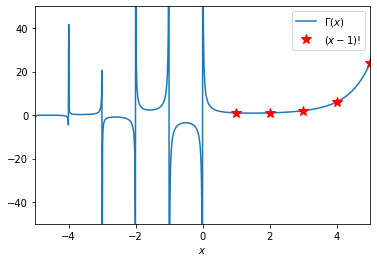

In [67]:
from scipy.special import gamma

# Plot gamma function 
x = np.linspace(-5, 5, 1000)
plt.plot(x, gamma(x), label='$\Gamma(x)$')

# Plot (x-1)! for x = 1, 2, ..., 6
xint = 1+np.arange(6)
factorials = [np.math.factorial(x-1) for x in xint]
plt.plot(xint, factorials, '*', ms=10, color='red', label='$(x-1)!$')

# Style
plt.ylim(-50,50)
plt.xlim(-5, 5)
plt.xlabel('$x$')
plt.legend()

### Exercises

**Events, sets, probability**

Consider an experiment with N equally likely outcomes, involving two events A and B. 
Let $N_1$ be the number of events in which A occurs but not B
Let $N_2$ be the number of events in which B occurs but not A
Let $N_3$ be the number of events in which both A and B occur
Let $N_4$ be the number of events in which Neither A nor B ocurs

1. Check that $\sum^{4}_{i=1} N_i=1$

2. What would be the expressions of $P(A)$ and $P(B)$ in terms of $N_i$?

3. What would be the expression of $P(A+B)$ in terms of $N_i$?

4. What would be the expression of $P(A|B)$ and $P(A|B)$ in terms of $N_i$?

5. Show that $P(A+B) = P(A) +cP(B) - P(AB)$ and $P(AB) = P(B)P(A|B) = P(A)P(B|A)$

**Die rolls**

- What is a probability of obtaining number=6 three times in a row when rolling three independent die at once? What about rolling same dice three times?

- What is a probability of obtaining a combined sum of 6 when rolling three die?

- On average, how many times ($\langle n \rangle$ ) must a 6-sided die be rolled until a 6 turns up? (Hint: we must compute average using n roles out of which n-1 did not turn out 6. $\langle n \rangle = \sum^{\infty}_n P(n) n)$


**Sock combinations**

A sock is selected at random and removed from a drawer containing five brown
socks and three green socks. A second random sock is then removed. What is the
probability that two different colors are selected?


### Problems

**Smart gambler.**
 
 You flip a coin 10 times and record the data in the form
of head/tails or 1s and 0s
-  What would be the probability of ladning 4 H's?
-  What would be the probability of landing HHHTTTHHHT sequence?
-  In how many ways can we have 2 head and 8 tails in this experiments?
-  Okay, now you got tired of flipping coins and decide to play some dice. You throw die
10 times what is the probability of never landing number 6?
- You throw a die 3 times what is the probability of obtaining a combined sum of 7?

**Practicing counting. Gas molecules.**

$$C^{N}_{k}$$

A container of volume $V$ contains $N$ molecules of a gas. We assume that the gas is dilute so that the position of any one molecule is independent of all other molecules. Although the density will be uniform on the average, there are fluctuations in the density. Divide the volume $V$ into two parts $V_1$ and $V_2$, where $V = V_1 + V_2$. 
- What is the probability p that a particular molecule is in each part? 
- What is the probability that $N_1$ molecules are in $V_1$ and $N_2$ molecules are in $V_2$? 
- What is the average number of molecules in each part? 
- What are the relative fluctuations of the number of particles in each part?

**Binomial, Gaussian and Poisson: The 3 distributions to know before heading to Las Vegas.**

- Show that in large number limit binomial distribution tends to gaussian. Show is by expanding binomial distirbution $logp(n)$ in power series showing that terms beyond quadratic can be ignored. 

- In the limit $N\rightarrow \infty$ but for very small values of $p \rightarrow 0$ such that $\lambda =pN=const$ there is another distribution that better approximates Binomial distribution: $p(x)=\frac{\lambda^k}{k!}e^{-\lambda} $ It is known as Poisson distribution. <br>
Poisson distribution is an excellent approximation for probabilities of rare events. Such as, infrequently firing neurons in the brain, radioactive decay events of Plutonium or rains in the desert. <br>  Derive Poisson distribution by taking the limit of $p\rightarrow 0$ in binomial distribution.

- Using numpy and matplotlib plot binomial probability distribution
against Gaussian and Poisson distributions for different values of N=(10,100,1000,10000). <br>
Do four plots for the following values 
p=0.0001, 0.001, 0.01, 0.1. You can use  subplot functionality to make a pretty 4 column plot.  

```python
fig, ax =  plt.subplots(nrows=1, ncols=4)

ax[0].plt()
ax[1].plt()
ax[2].plt()
ax[3].plt()
```

````

**Optional Project:** [Porosity of materials](https://en.wikipedia.org/wiki/Porosity)

A simple model of a porous rock can be imagined by placing a series of overlap- ping spheres at random into a container of fixed volume $V$ . The spheres represent the rock and the space between the spheres represents the pores. If we write the volume of the sphere as v, it can be shown the fraction of the space between the spheres or the porosity $\phi$ is $\phi =e^{-Nv/V}$, where $N$ is the number of spheres. 

For simplicity, consider a 2D system, (e.g $v=\frac{1}{4}\pi d^2$, see [wiki](https://en.wikipedia.org/wiki/Area_of_a_circle) if you forgot the formula). 
Write a python function which place disks of $d=1$ into a square box. The disks can overlap. Divide the box into square cells each of which has an edge length equal to the diameter of the disks. Find the probability of having 0, 1, 2, or 3 disks in a cell for $\phi$ = 0.03, 0.1, and 0.5.

> You will need [np.random.uniform()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.uniform.html) to randomly place N disks of volume v into volume V. 
> Check out this cool python lib for porosity evaluation of materials [R Shkarin, et al Plos Comp Bio 2019](https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0215137&type=printable)